   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


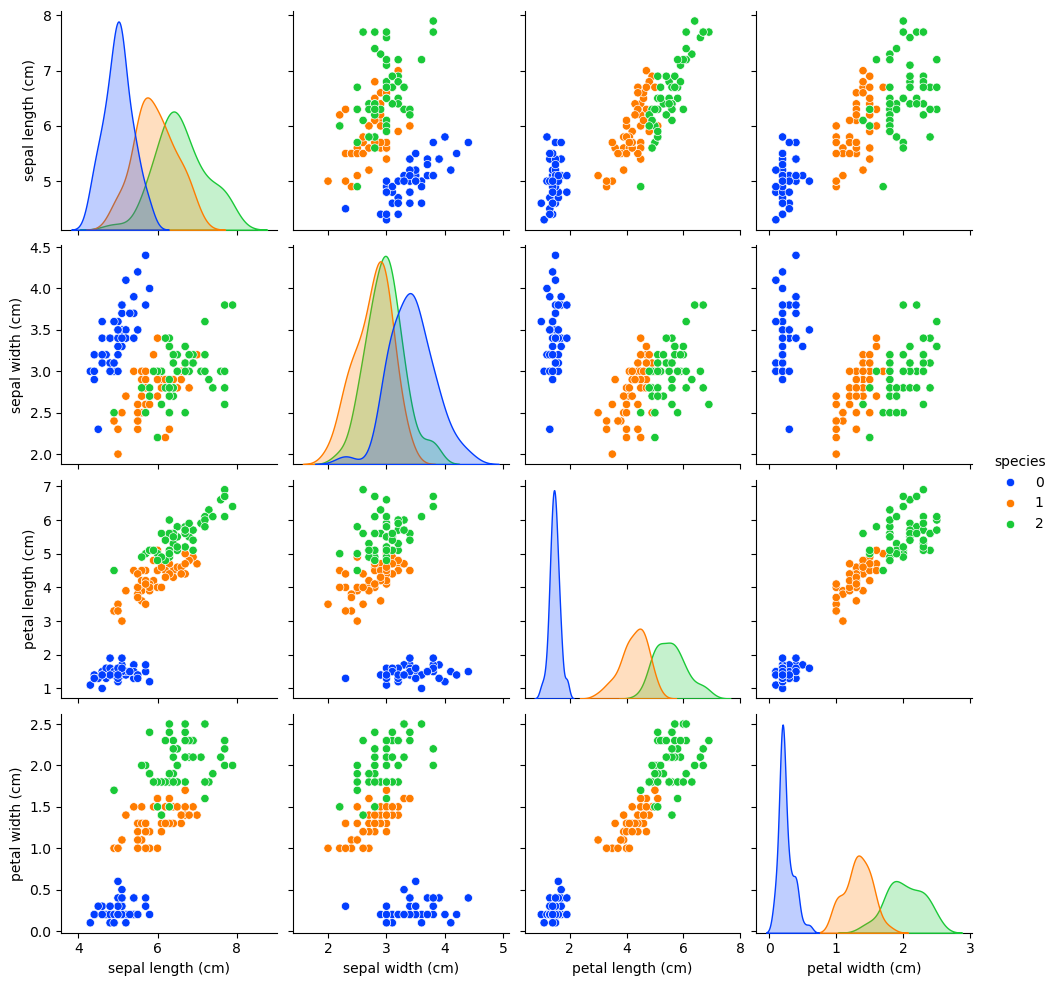

In [2]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import seaborn as sns 

X, y = load_iris(as_frame=True,return_X_y=True)

print(X.head())

iris_df = X.copy() 
iris_df['species'] = y  

sns.pairplot(iris_df,hue='species',palette='bright')

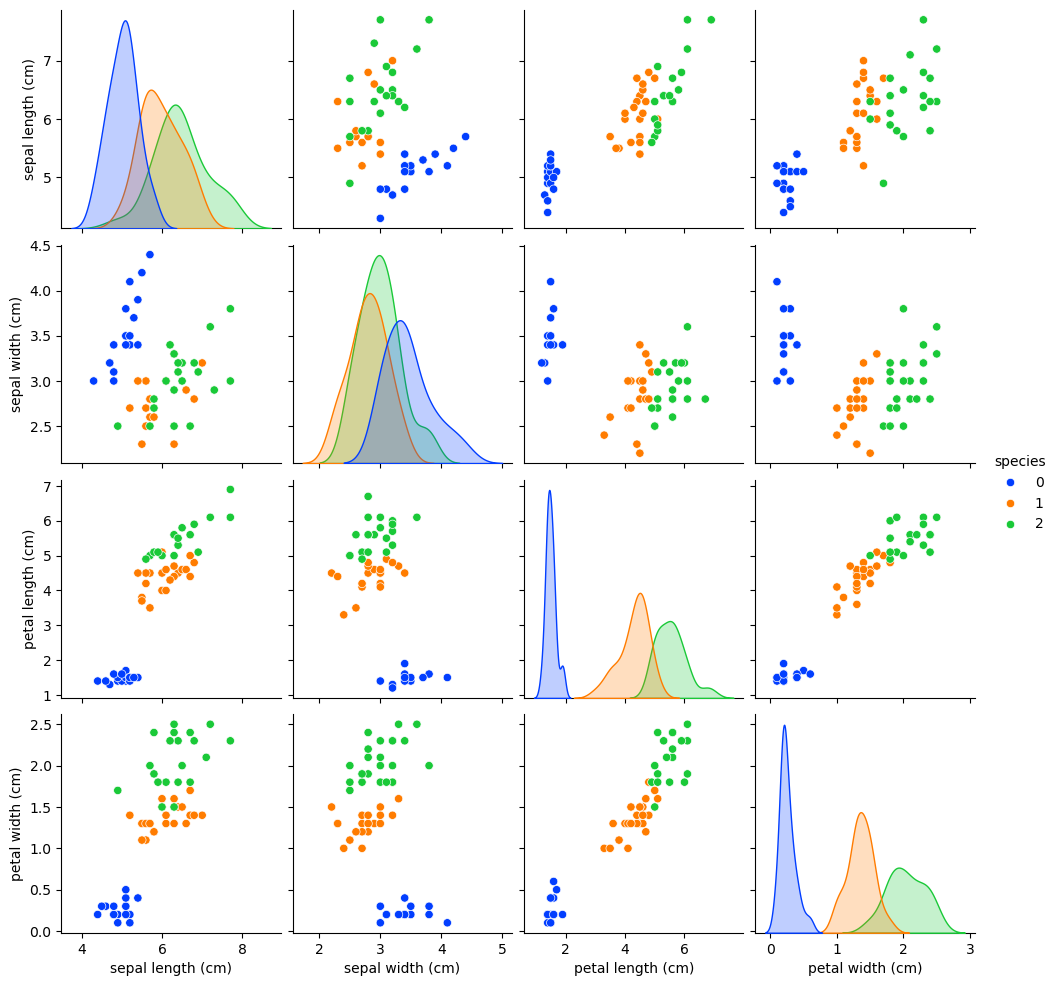

In [3]:
X_NaN = X.copy() 
mask = np.random.uniform(0,1,size=(X.shape))
mask = mask < 0.4 
X_NaN[mask] = np.nan 

iris_df_NaN = X_NaN.copy() 
iris_df_NaN['species'] = y 

sns.pairplot(iris_df_NaN,hue='species',palette='bright')


In [4]:
iris_df_NaN.isna().sum()

sepal length (cm)    62
sepal width (cm)     61
petal length (cm)    58
petal width (cm)     57
species               0
dtype: int64

<Axes: >

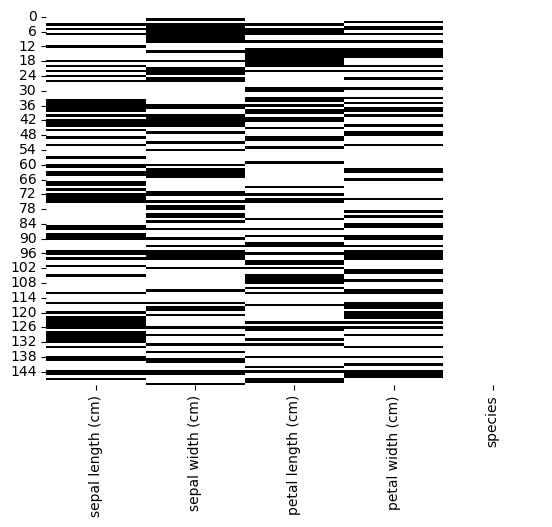

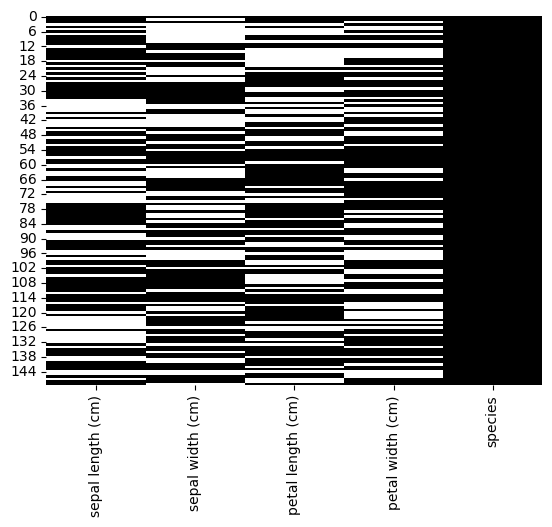

In [5]:
is_NaN = iris_df_NaN.isna()
fig, ax = plt.subplots()
sns.heatmap(is_NaN,cmap='gray_r',cbar=False,ax=ax)

is_not_NaN = iris_df_NaN.notna() 
fig, ax = plt.subplots()
sns.heatmap(is_not_NaN,cmap='gray_r',cbar=False,ax=ax)






In [6]:
# 缺失值总结
print(iris_df_NaN.isna().sum()*100/len(iris_df_NaN))

sepal length (cm)    41.333333
sepal width (cm)     40.666667
petal length (cm)    38.666667
petal width (cm)     38.000000
species               0.000000
dtype: float64


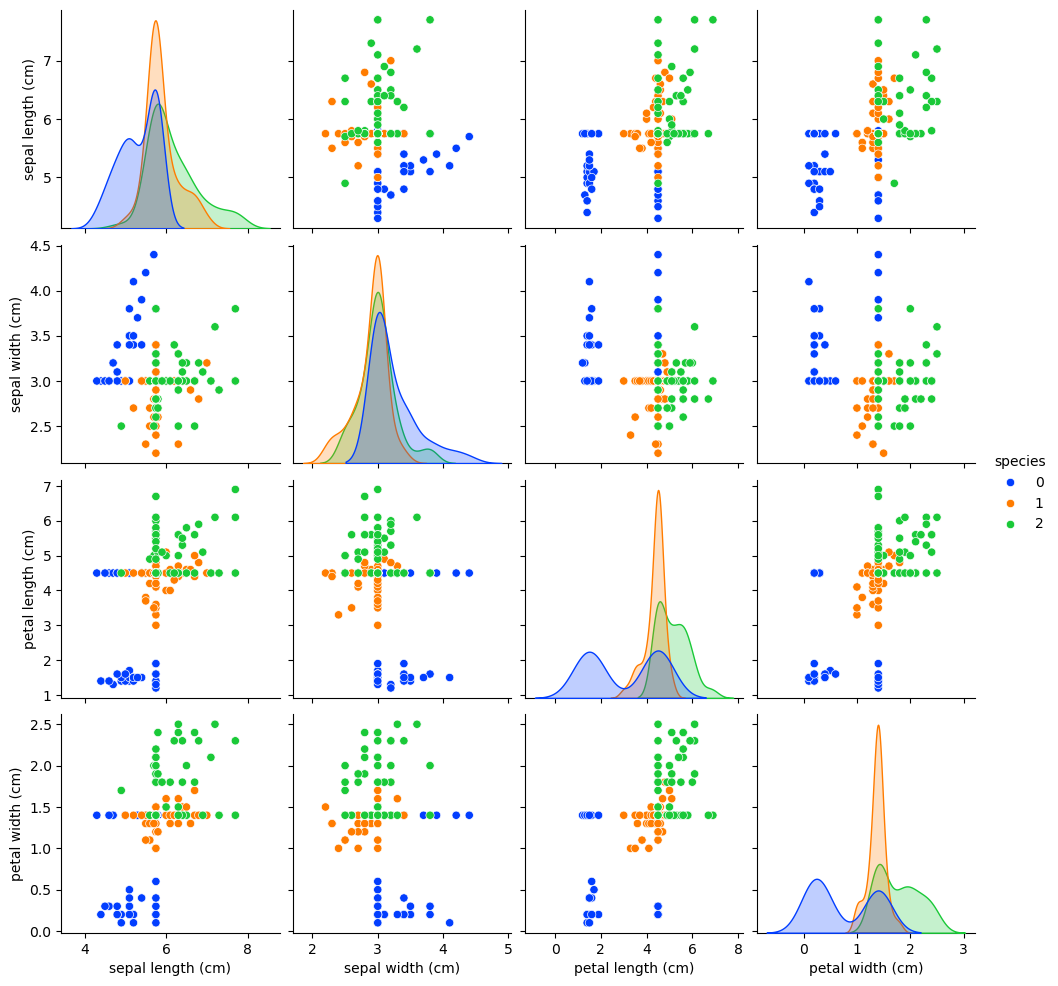

In [9]:
# 单变量差值
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy='median')
X_NaN_median = si.fit_transform(X_NaN)

iris_df_NaN_median = pd.DataFrame(X_NaN_median,
                                  columns=X_NaN.columns,
                                  index=X_NaN.index)
iris_df_NaN_median['species'] = y 

sns.pairplot(iris_df_NaN_median,hue='species',palette='bright')

